<a href="https://colab.research.google.com/github/vincent4u/Assignment-Code/blob/master/case_study3_(222).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataBiomass_CE880_1.csv to dataBiomass_CE880_1.csv


**Step 1: Installing Libraries**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
np.random.seed(42)
from scipy.stats import pearsonr
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Step 2.:loading the datafile**

In [9]:
dts=pd.read_csv("/content/dataBiomass_CE880_1.csv")
df=dts.iloc[0:336,1:16]


# **Step 3: Exploratory Data Analysis (EDA)**

In [ ]:
df.head()


In [ ]:
df.info(verbose=True)

In [ ]:
df.describe().T

**Observing the distribution curve of the Target variable**

In [ ]:
targets = ['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']
# Setting the figure size
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Ploting the density curve and histogram-like plot for each column in columns_of_interest
for column in targets:
    plt.figure()  # Create a new figure for each column
    sns.displot(df[column], bins=30, kde=True)
    plt.title('Skew Curve for ' + column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.show()

In [ ]:
## visualizing outliers: for better decision making
# The columns of interest
targets = ['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']

# Creating subplots for each column in the columns_of_interest
fig, axes = plt.subplots(nrows=len(targets), ncols=2, figsize=(12, 6 * len(targets)))

if len(targets) == 1:
    column = targets[0]
    axes[0][0].hist(df[column], bins=30, edgecolor='black')
    axes[0][0].set_xlabel('Values')
    axes[0][0].set_ylabel('Frequency')
    axes[0][0].set_title('Skew Curve for ' + column)
    sns.boxplot(x=df[column], ax=axes[0][1])
    axes[0][1].set_xlabel('Values')
    axes[0][1].set_ylabel('')

else:
    for i, column in enumerate(targets):
        ax_hist = axes[i][0]
        ax_box = axes[i][1]
        ax_hist.hist(df[column], bins=30, edgecolor='black')
        ax_hist.set_xlabel('Values')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title('Skew Curve for ' + column)
        sns.boxplot(x=df[column], ax=ax_box)
        ax_box.set_xlabel('Values')
        ax_box.set_ylabel('')
        ax_box.get_yaxis().set_visible(False)  # Hide y-axis labels for boxplot

plt.tight_layout()
plt.show()

**calculating Pearson correlations between each feature and each target variable**

In [ ]:
from scipy.stats import pearsonr

features = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure', 'Equivalance mass ratio', 'Steam to biomass mass ratio', 'Superficial gas velocity']]
targets = df[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']]
# Assuming features and targets are your DataFrames
for feature_column in features.columns:
    for target_column in targets.columns:
        correlation, _ = pearsonr(features[feature_column], targets[target_column])
        print(f'Pearson correlation between {feature_column} and {target_column}: {correlation:.2f}')

In [13]:
features = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure', 'Equivalance mass ratio', 'Steam to biomass mass ratio', 'Superficial gas velocity']]
targets = df[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']]


# **Step 4: Normalization**


In [14]:

# Set up features (X)
features = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure', 'Equivalance mass ratio', 'Steam to biomass mass ratio', 'Superficial gas velocity']]
X = pd.DataFrame(features.values, columns=features.columns)

# Set up targets (y)
targets = df[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']]
y = pd.DataFrame(targets.values, columns=targets.columns)

Robust_transformer = RobustScaler()
Transforemed_targets=Robust_transformer.fit(X)
Transforemed_targets=Robust_transformer.fit(y)
# Split the dataset into training and testing and Validation sets
features_train, features_test, targets_train,targets_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
# Normalize the training,testing and validation for the features_dataset
X_train = scaler.fit_transform(features_train)
X_test = scaler.transform(features_test)

# # Normalize the training,testing and validation for the targets_datast
y_train = scaler.fit_transform(targets_train)
y_test = scaler.transform(targets_test)



**Step 5: implementing the Models**

# **model = XGBRegressor(tree_method='hist')**

RMSE Scores: [0.40237018 0.61524236 0.41541312 0.33444231 0.36182879 0.58514307
 0.40279168]
R^2 Scores: [0.86713242 0.70107856 0.84372917 0.89535144 0.85283848 0.66256132
 0.78936058]
R^2 Scores: 0.8017217090425924


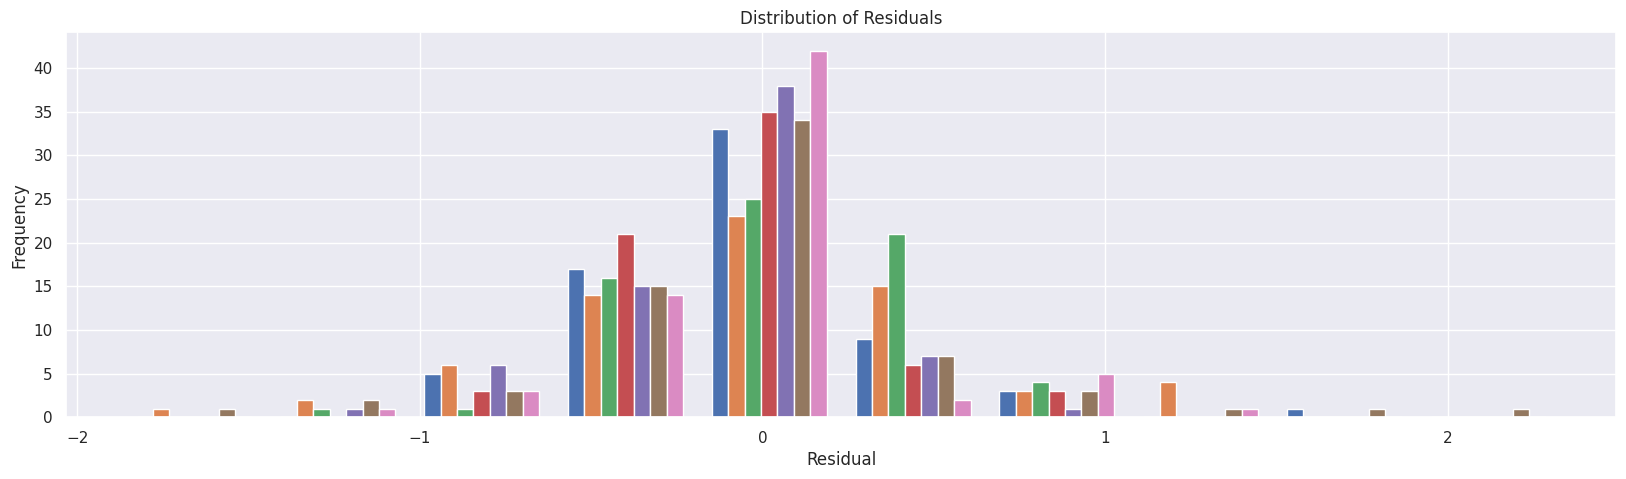

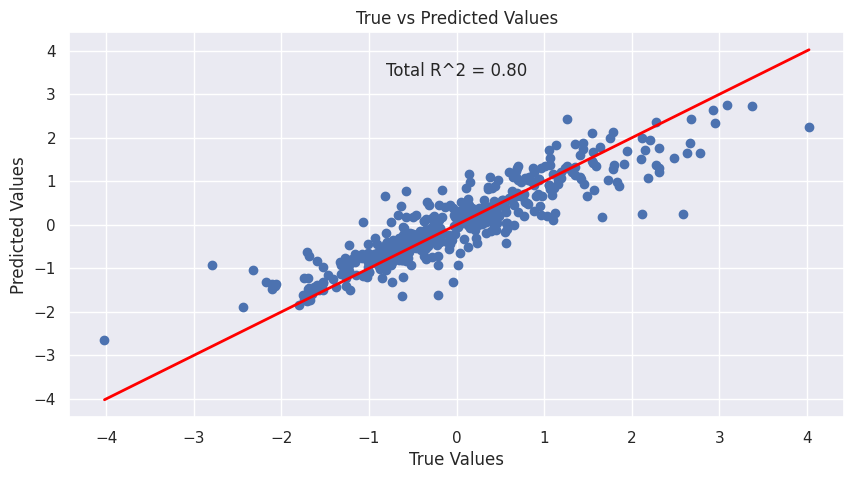

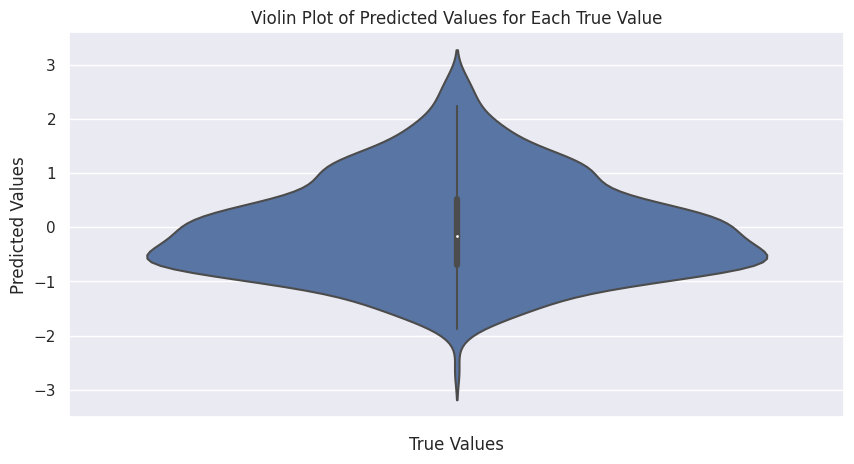

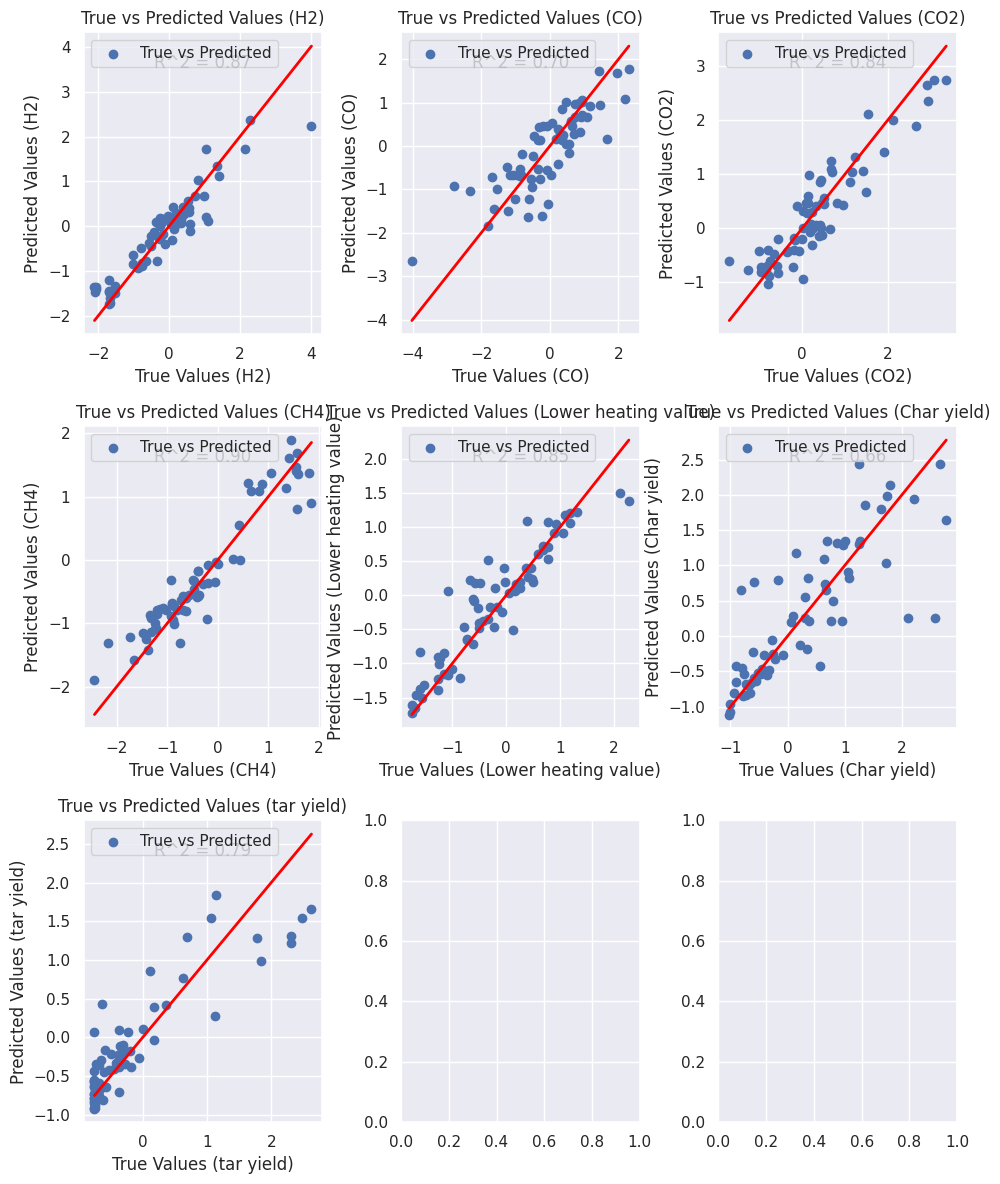

In [15]:
# Define and train the model
best_params = {
    "objective": "reg:squarederror",
    "n_estimators": 500,
    "verbosity": 0,
    "learning_rate": 0.0255709534112944,
    "max_depth": 6,
    "subsample":  0.8750699631919016,
    "colsample_bytree": 0.41208987840060635,
    "min_child_weight": 10
}

# Create an XGBRegressor model with the best hyperparameters

model = XGBRegressor(**best_params,tree_method='hist')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate RMSE for each target column in y_pred
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)

r2_scores = r2_score(y_test, y_pred)
print("R^2 Scores:", r2_scores)

residuals = y_test - y_pred
plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Calculate and print R^2 value
r2_total = r2_score(y_test, y_pred, multioutput='variance_weighted')
plt.text(0.5, 0.9, f'Total R^2 = {r2_total:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
plt.figure(figsize=(10, 5))
sns.violinplot(y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Violin Plot of Predicted Values for Each True Value')
plt.show()

num_columns = 3

# Calculate the number of rows needed
num_rows = (len(targets.columns) + num_columns - 1) // num_columns

# Create subplots with a smaller figsize
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each target variable
for i, target_column in enumerate(targets.columns):
    # Scatter plot
    axes[i].scatter(y_test[:, i], y_pred[:, i], label='True vs Predicted')

    # Diagonal line for reference
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], color='red', linewidth=2)

    # Calculate and print R^2 value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.5, 0.9, f'R^2 = {r2:.2f}', ha='center', va='center', transform=axes[i].transAxes)

    axes[i].set_xlabel(f'True Values ({target_column})')
    axes[i].set_ylabel(f'Predicted Values ({target_column})')
    axes[i].set_title(f'True vs Predicted Values ({target_column})')
    axes[i].legend()

plt.tight_layout()

# Save the figure
fig.savefig('XGBoost_figure.png')

# Show the figure
plt.show()

In [16]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


**Hyperparameter tuning for XGBRegressor**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    # Split your data into training and validation sets
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=10),  # Adjust the range as needed
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

***Implementing Best_param for XGBoostRegressor***

RMSE Scores: [0.3476356  0.57114284 0.35783179 0.33634815 0.33680182 0.58592903
 0.39689012]
R^2 Scores: [0.90082187 0.74239512 0.88404877 0.89415535 0.87249216 0.66165423
 0.79548779]
R^2 Scores: 0.8215793264872915


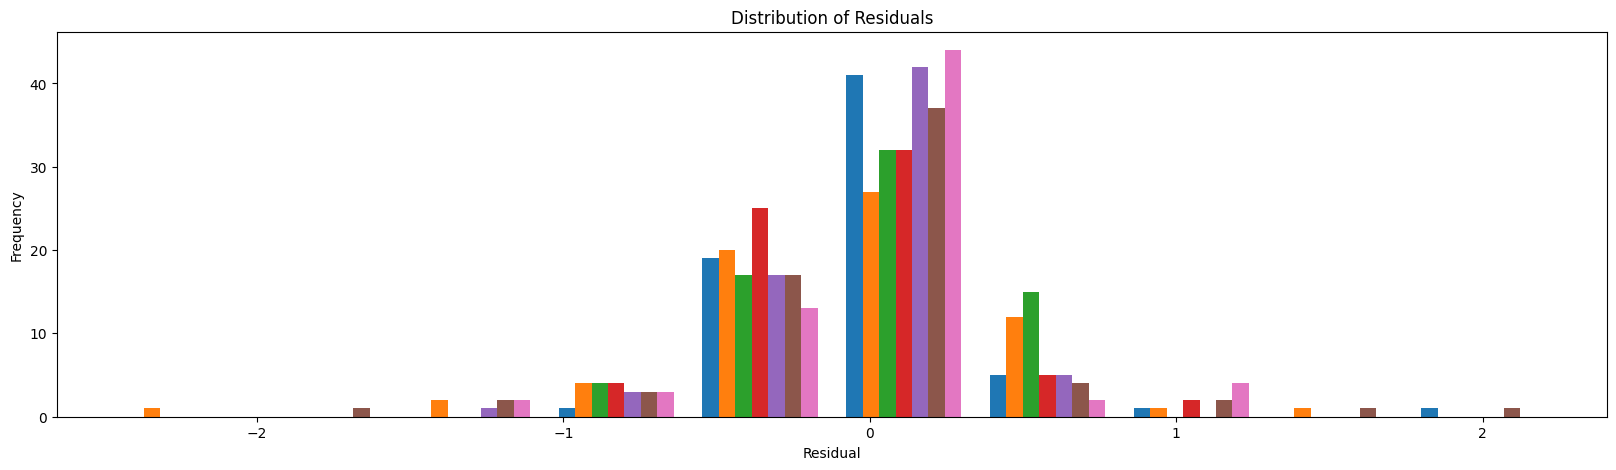

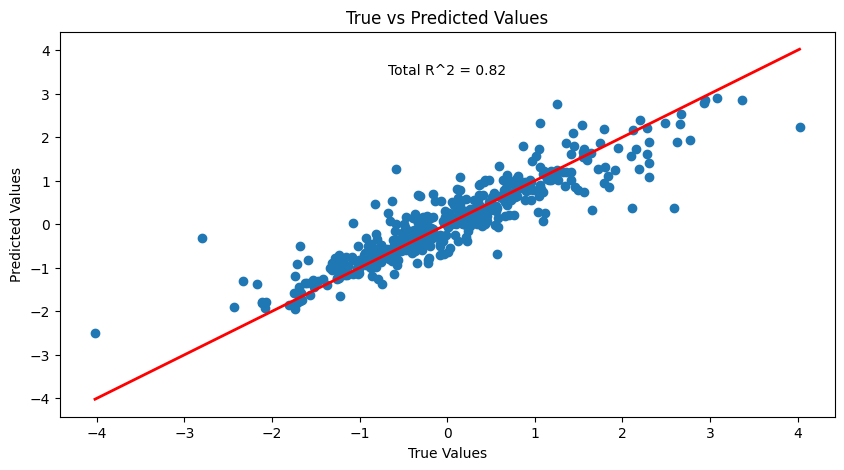

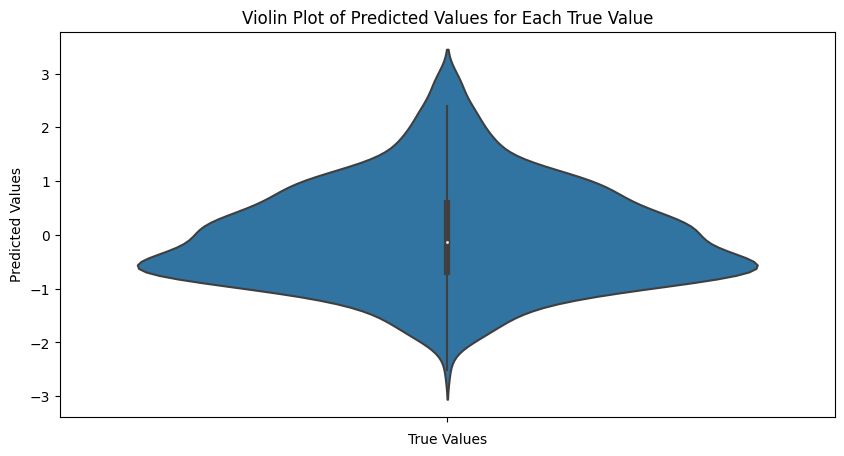

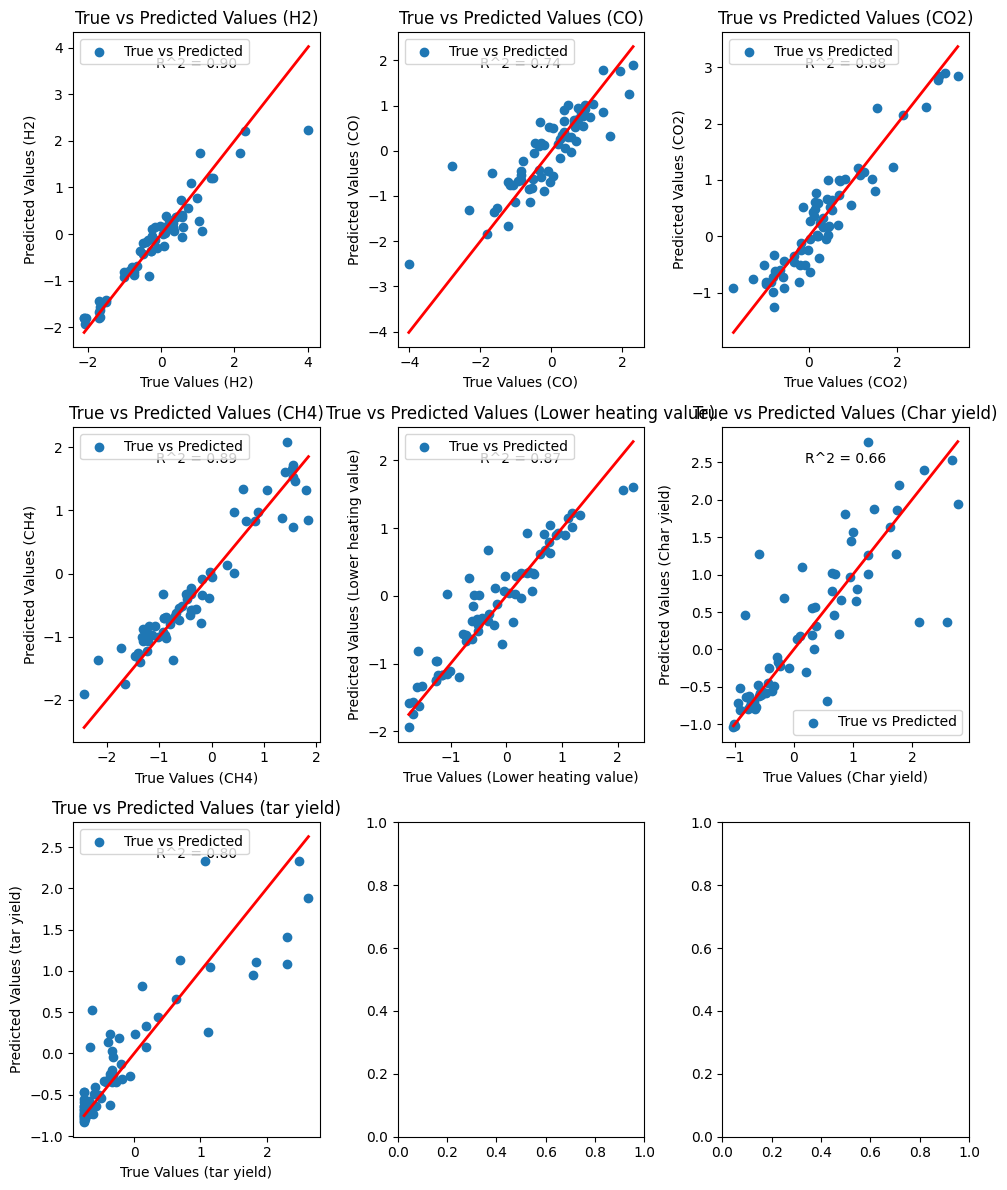

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Set the best hyperparameters found by Optuna
best_params = {
    "objective": "reg:squarederror",
    "n_estimators": 230,
    "verbosity": 0,
    "learning_rate": 0.06974211483527425,
    "max_depth": 5,
    "subsample":  0.6635632489941928,
    "colsample_bytree": 0.5153962652156941,
    "min_child_weight": 2
}

# Create an XGBRegressor model with the best hyperparameters
model = xgb.XGBRegressor(**best_params)

# Train the model on the training data
model.fit(X_train, y_train, verbose=False)

# Make predictions on the validation data
y_pred = model.predict(X_test)


# Calculating RMSE for each target column in y_pred
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

# Calculating R2 for each target column in y_pred
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)
r2_scores = r2_score(y_test, y_pred)
print("R^2 Scores:", r2_scores)

residuals = y_test - y_pred
plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Calculate and print R^2 value
r2_total = r2_score(y_test, y_pred, multioutput='variance_weighted')
plt.text(0.5, 0.9, f'Total R^2 = {r2_total:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
plt.figure(figsize=(10, 5))
sns.violinplot(y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Violin Plot of Predicted Values for Each True Value')
plt.show()

num_columns = 3

# Calculate the number of rows needed
num_rows = (len(targets.columns) + num_columns - 1) // num_columns

# Create subplots with a smaller figsize
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each target variable
for i, target_column in enumerate(targets.columns):
    # Scatter plot
    axes[i].scatter(y_test[:, i], y_pred[:, i], label='True vs Predicted')

    # Diagonal line for reference
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], color='red', linewidth=2)

    # Calculate and print R^2 value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.5, 0.9, f'R^2 = {r2:.2f}', ha='center', va='center', transform=axes[i].transAxes)

    axes[i].set_xlabel(f'True Values ({target_column})')
    axes[i].set_ylabel(f'Predicted Values ({target_column})')
    axes[i].set_title(f'True vs Predicted Values ({target_column})')
    axes[i].legend()

plt.tight_layout()

# Save the figure
fig.savefig('XGBoost_figure.png')

# Show the figure
plt.show()


# **Model= LightGBM-Gradient Boosting Decision Tree (GBDT)**

***Implementing a simple LightGBM with MultioutputRegressor Wrapper***

In [ ]:
#A LightGBM Model
# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Defining hyperparameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'num_iterations': 1000,
    'n_estimators': 100
}


# Training the LightGBM model
lgb_model = lgb.LGBMRegressor(**params)
model = MultiOutputRegressor(lgb_model)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

#calculating the  (RMSE) values for each output separately
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

#Calculating the coefficient of determination (R-squared or R^2 score) for each output separately.
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

***HyperParameter Tunning of the LightGBM model***

Objective;
  - To obtain and implement the best_parameter on the LightGBM

In [ ]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 20),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1.0),

        "verbosity": 0,
    }
    gbm = lgb.LGBMRegressor(**params)
    model = MultiOutputRegressor(gbm)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=True)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)


***Implementing the obtained best_param on the LightGBM model***

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 8
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

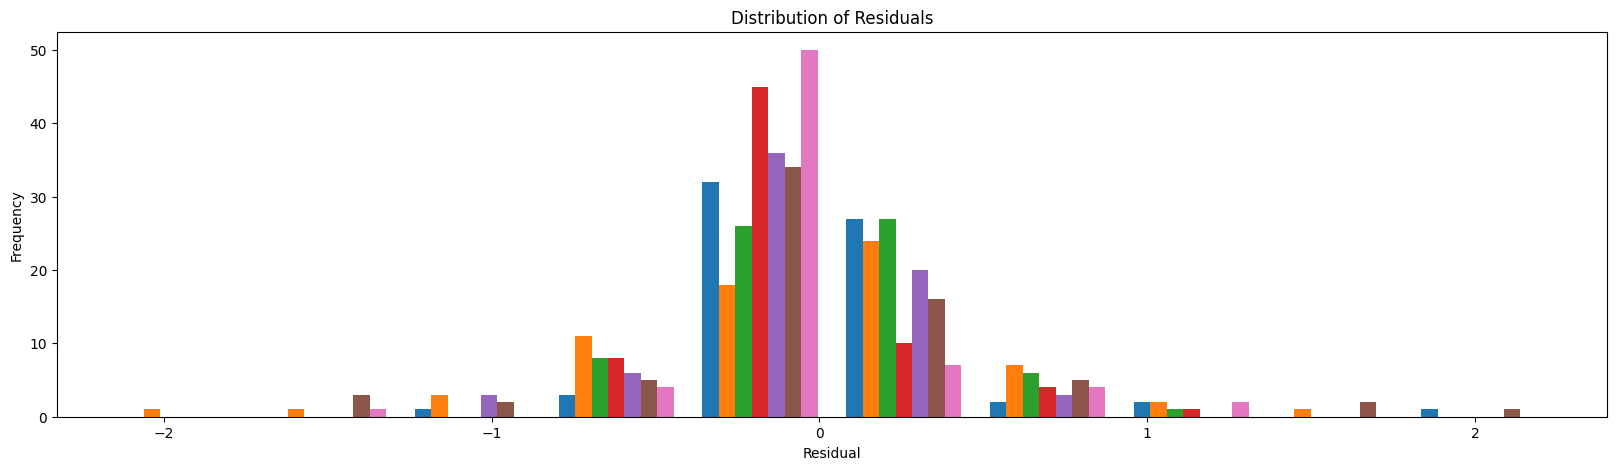

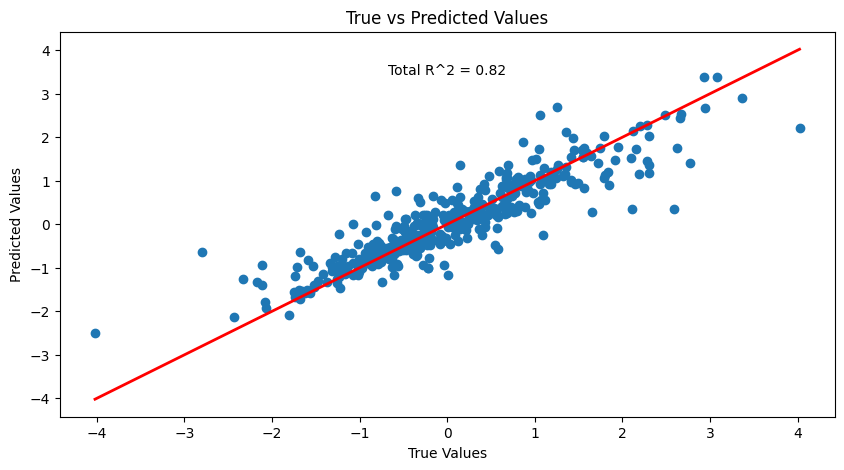

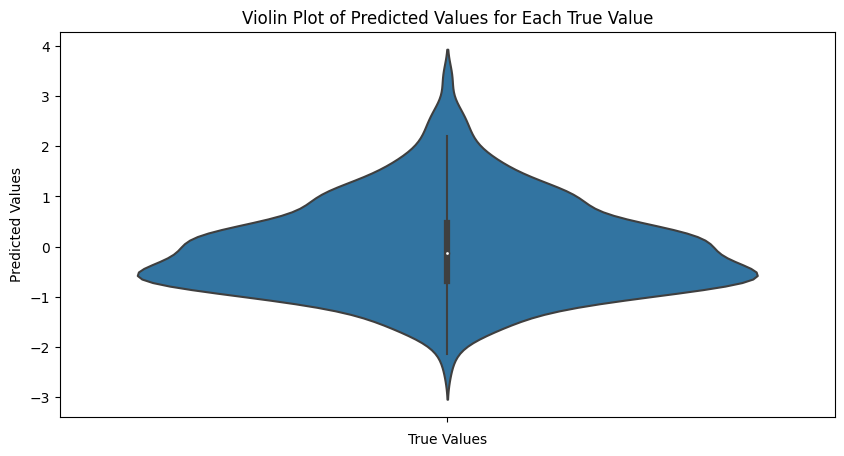

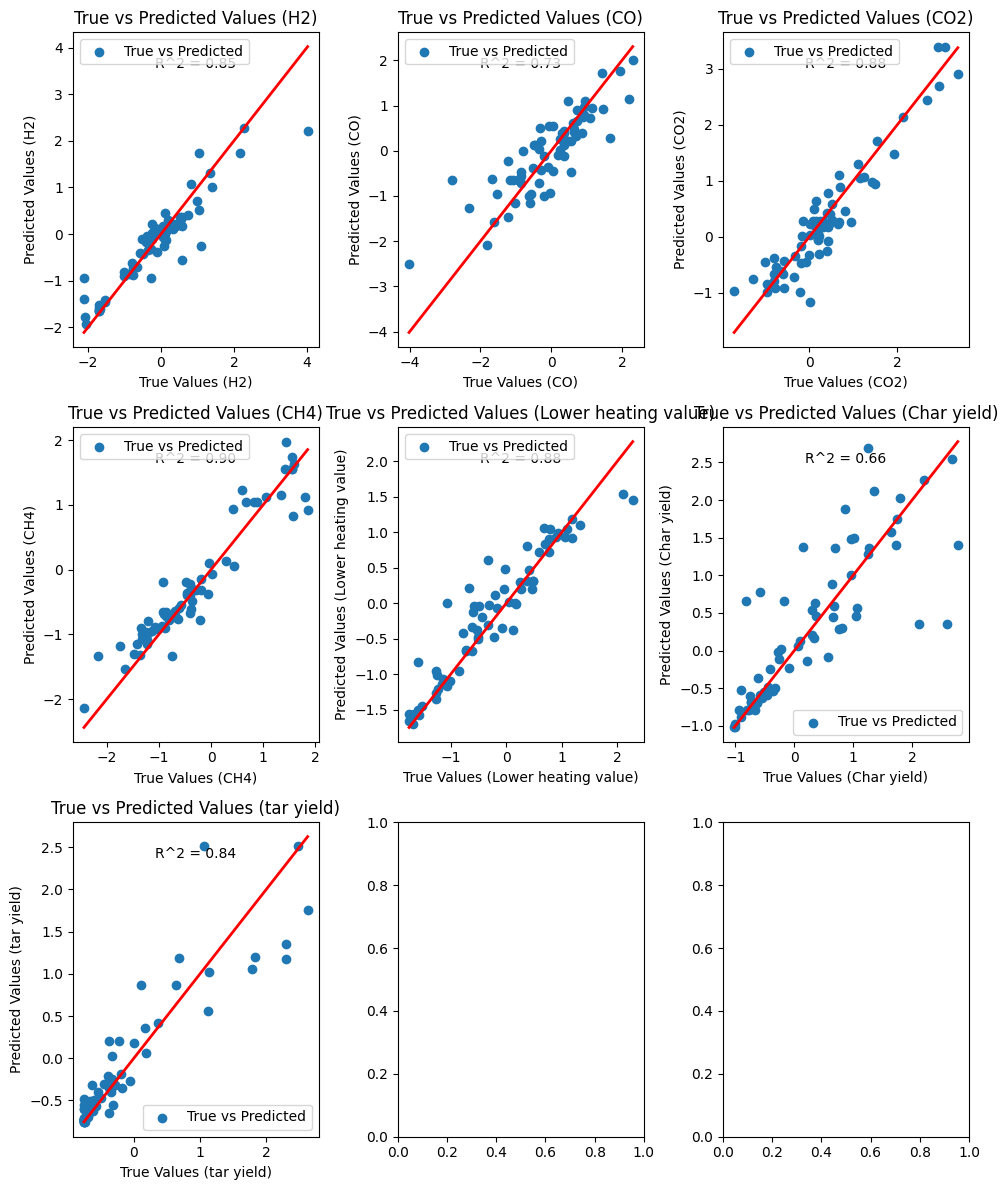

In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate':  0.008205225520475734,
    'num_leaves': 309,
    'subsample': 0.41539469896846515,
    'colsample_bytree':0.7262726367786536,
    'num_iterations': 900,
    'n_estimators': 700,

    'reg_alpha': 0.3297803728412838,
    'reg_lambda': 0.034138739525795436,

    'min_data_in_leaf': 1,
}
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'learning_rate': 0.0413163182901069,
#     'num_leaves': 457,
#     'subsample': 0.10278012109662671,
#     'colsample_bytree':0.6931843908439858,
#     'num_iterations': 900,
#     'n_estimators': 800,

#     'reg_alpha': 0.4903706994035554,
#     'reg_lambda': 0.7460516923672987,

#     'min_data_in_leaf': 1,
# }
# Train the LightGBM model
gbm = lgb.LGBMRegressor(**params)
model = MultiOutputRegressor(gbm)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE scores
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

# Calculate R^2 scores
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)

r2_scores = r2_score(y_test, y_pred)
print("R^2 Scores:", r2_scores)


residuals = y_test - y_pred
plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Calculate and print R^2 value
r2_total = r2_score(y_test, y_pred, multioutput='variance_weighted')
plt.text(0.5, 0.9, f'Total R^2 = {r2_total:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
plt.figure(figsize=(10, 5))
sns.violinplot(y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Violin Plot of Predicted Values for Each True Value')
plt.show()

num_columns = 3

# Calculate the number of rows needed
num_rows = (len(targets.columns) + num_columns - 1) // num_columns

# Create subplots with a smaller figsize
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each target variable
for i, target_column in enumerate(targets.columns):
    # Scatter plot
    axes[i].scatter(y_test[:, i], y_pred[:, i], label='True vs Predicted')

    # Diagonal line for reference
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], color='red', linewidth=2)

    # Calculate and print R^2 value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.5, 0.9, f'R^2 = {r2:.2f}', ha='center', va='center', transform=axes[i].transAxes)

    axes[i].set_xlabel(f'True Values ({target_column})')
    axes[i].set_ylabel(f'Predicted Values ({target_column})')
    axes[i].set_title(f'True vs Predicted Values ({target_column})')
    axes[i].legend()

plt.tight_layout()

# Save the figure
fig.savefig('lightGBM_figure.png')

# Show the figure
plt.show()

# **Model= RandomForestRegressor**

Random Forest RMSE Scores: [0.41727304 0.57330059 0.43377421 0.37200389 0.37302761 0.57272173
 0.38189032]
Random Forest R^2 Scores: [0.85710794 0.740445   0.82960966 0.87052504 0.84358803 0.67673548
 0.81065407]


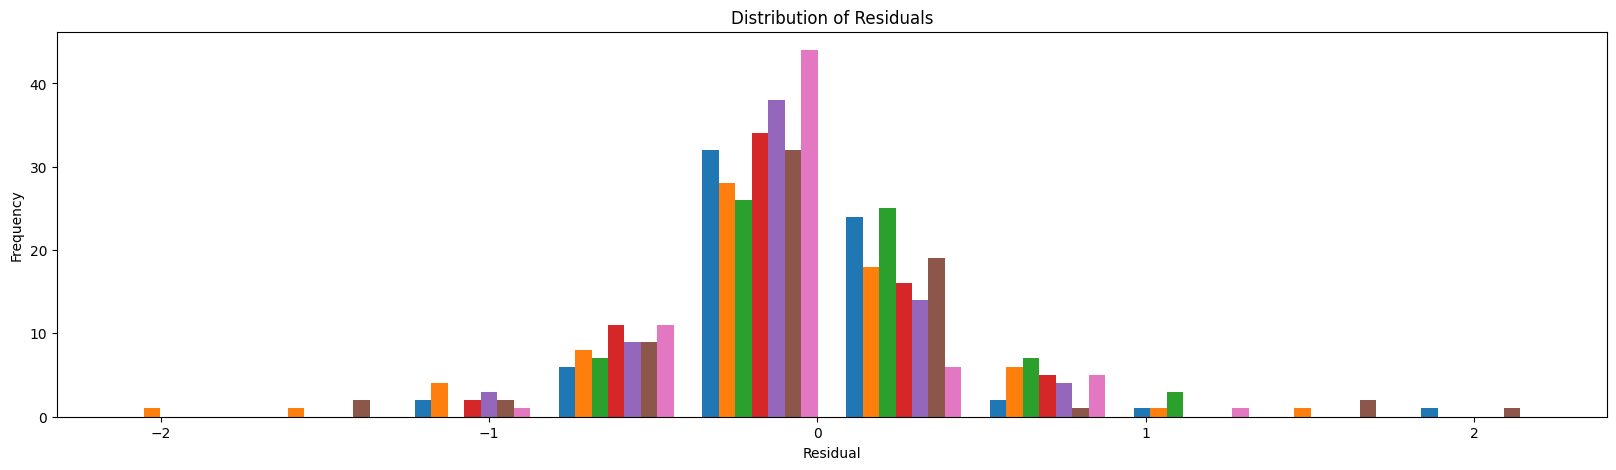

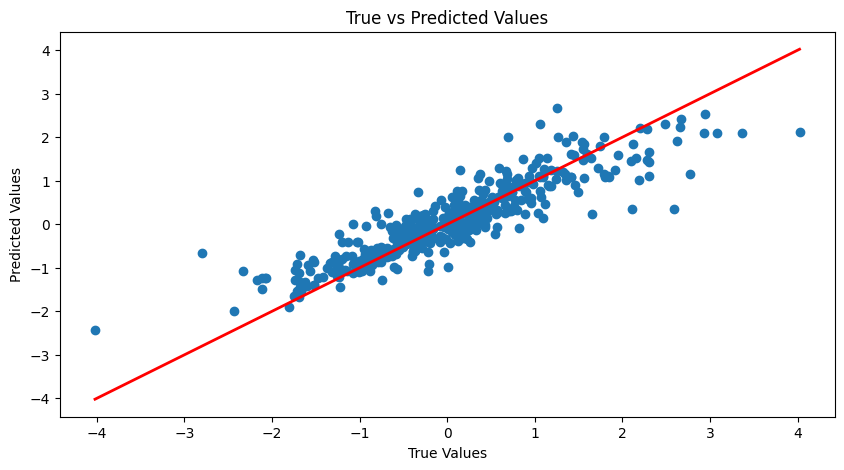

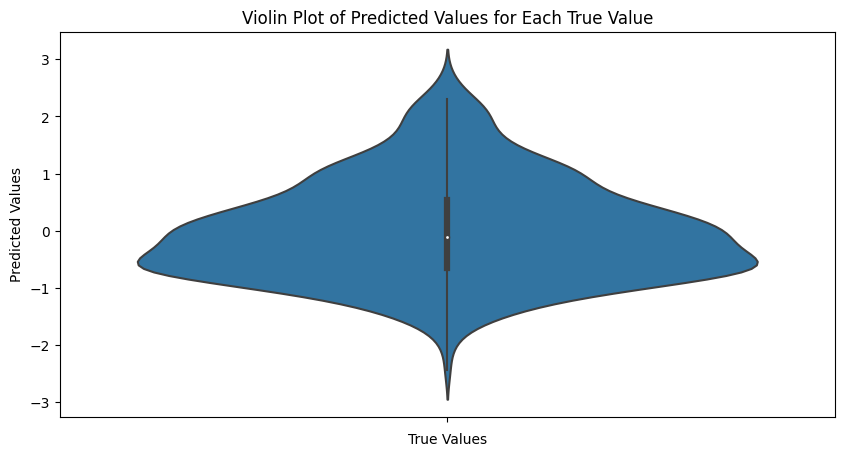

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions, multioutput='raw_values'))
rf_r2 = r2_score(y_test, rf_predictions, multioutput='raw_values')
print("Random Forest RMSE Scores:", rf_rmse)
print("Random Forest R^2 Scores:", rf_r2)

residuals = y_test - rf_predictions

plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(y=rf_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Violin Plot of Predicted Values for Each True Value')
plt.show()

***RandomForestRegressor Hyperparameter Tunning***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),

    }


    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=True)
    return rmse




study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Best hyperparameters_RandomForest:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2024-01-04 18:47:49,323] A new study created in memory with name: no-name-05a3e6fe-f068-49a0-9324-f55f65cb79e7
[I 2024-01-04 18:47:50,311] Trial 0 finished with value: 0.25361382300652546 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.25361382300652546.
[I 2024-01-04 18:47:51,121] Trial 1 finished with value: 0.9031535254943186 and parameters: {'n_estimators': 600, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.25361382300652546.
[I 2024-01-04 18:47:52,551] Trial 2 finished with value: 0.5269906018691572 and parameters: {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.25361382300652546.
[I 2024-01-04 18:47:53,825] Trial 3 finished with value: 0.4906726163100804 and parameters: {'n_estimators': 900, 'max_depth': 5, 

Best hyperparameters_RandomForest: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best RMSE: 0.21090132843363443


***Implementing RandomForestRegressor Best_params***_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest RMSE Scores: [0.4508374  0.57909726 0.47096262 0.38201268 0.39033404 0.56268414
 0.39360399]
Random Forest R^2 Scores: [0.83319567 0.73516972 0.79914142 0.86346425 0.82873805 0.68796732
 0.79886037]
Random Forest R^2 Scores: 0.7923624006308224


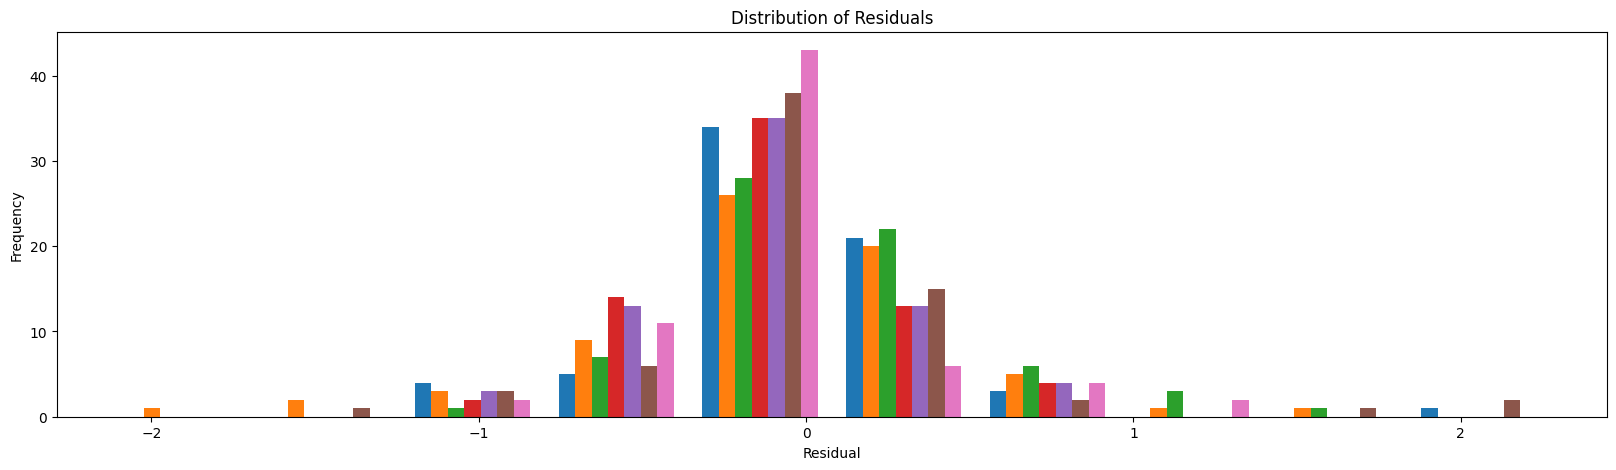

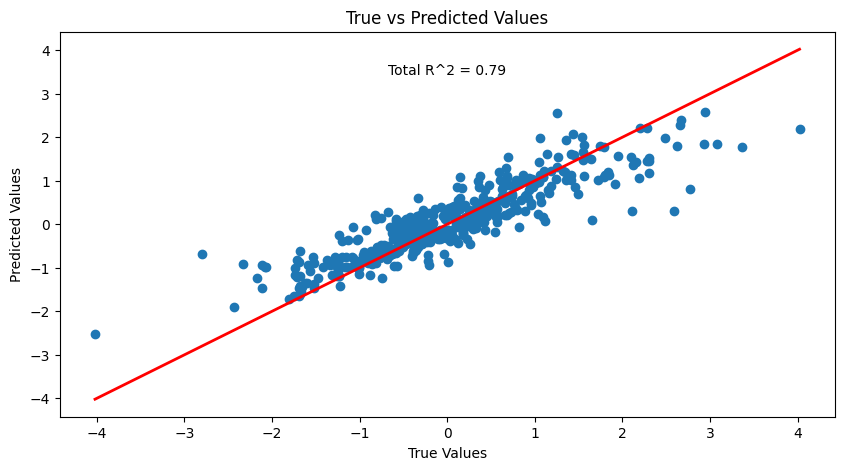

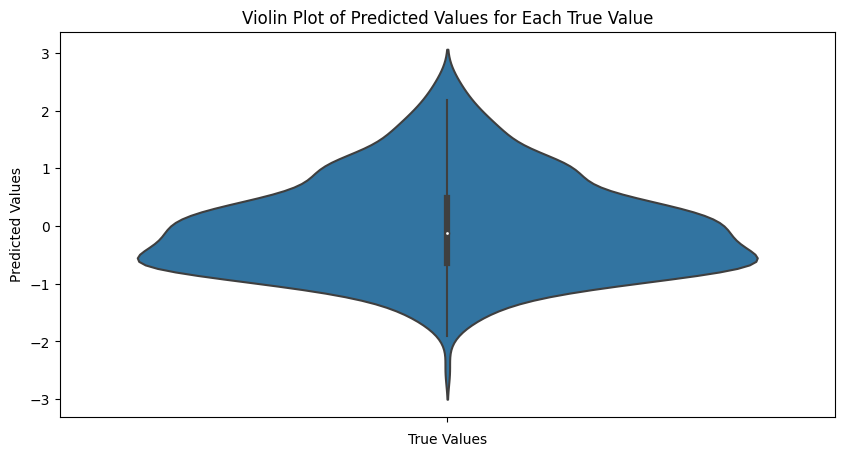

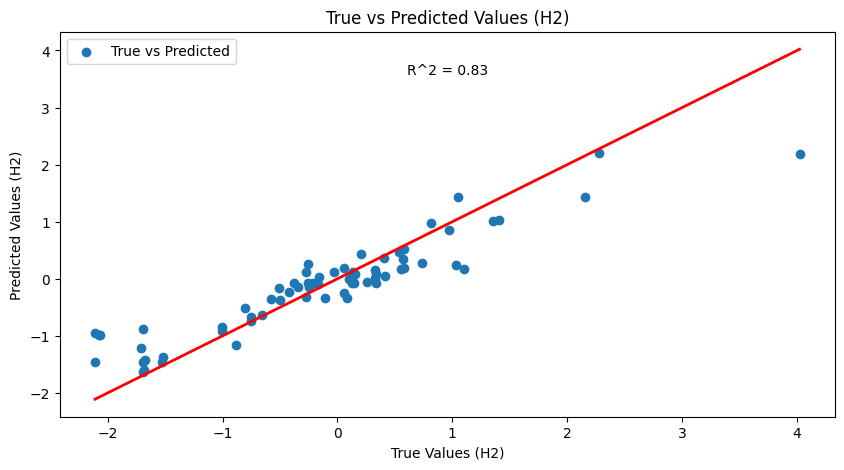

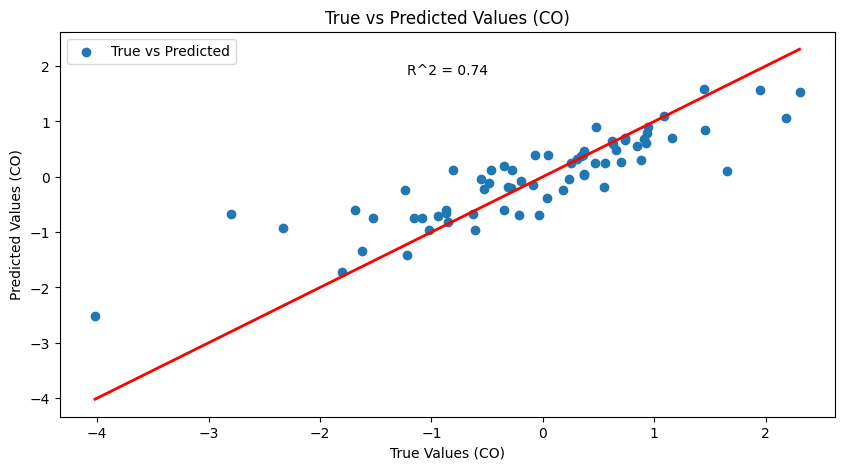

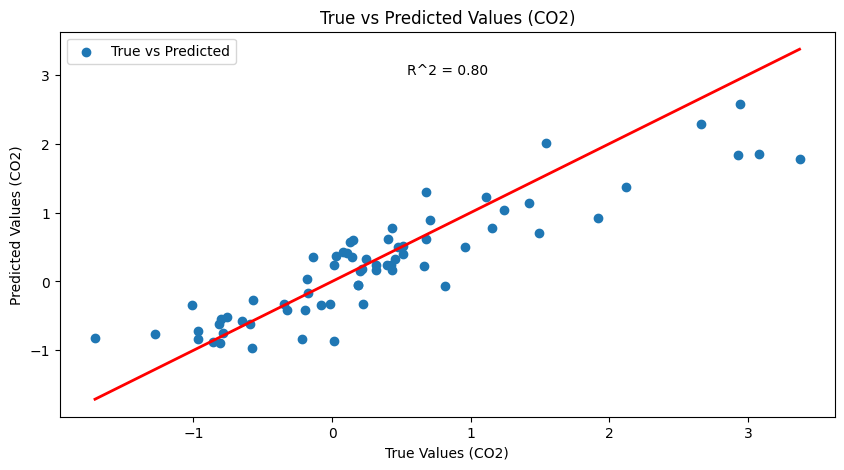

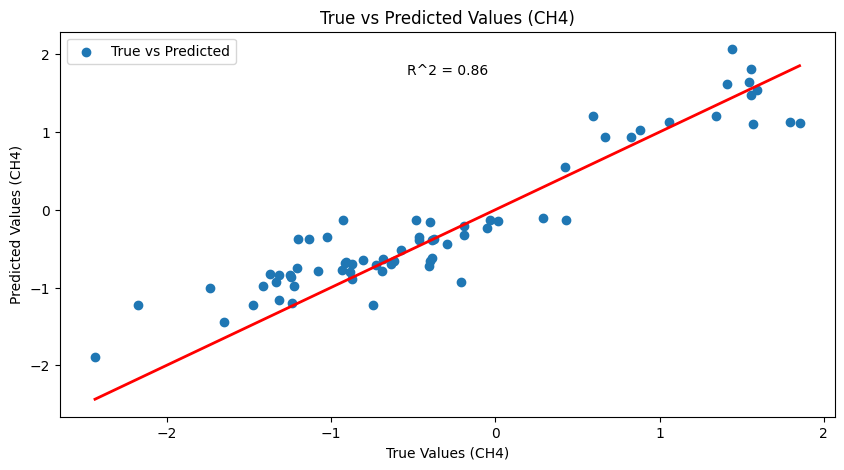

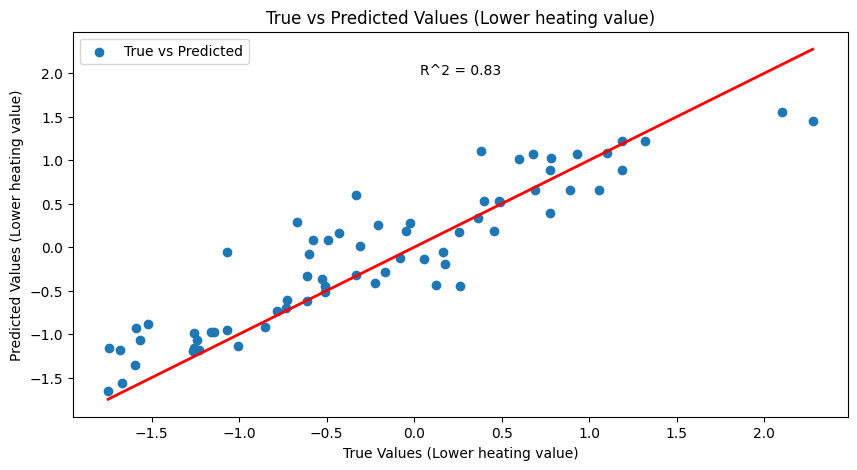

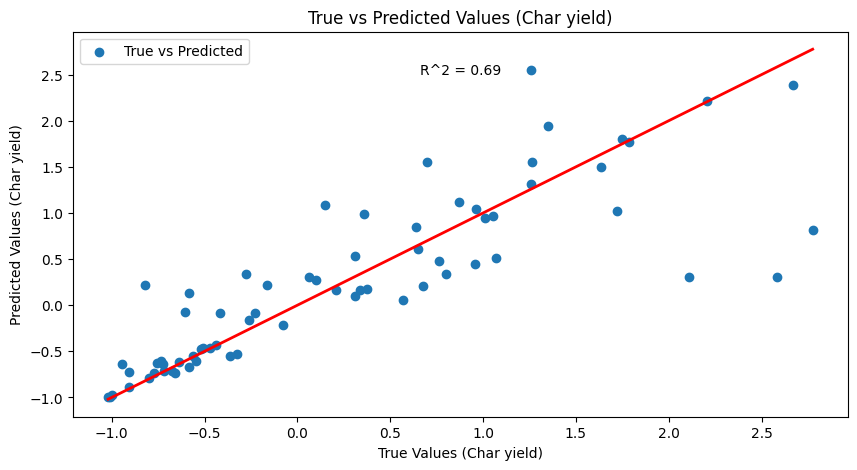

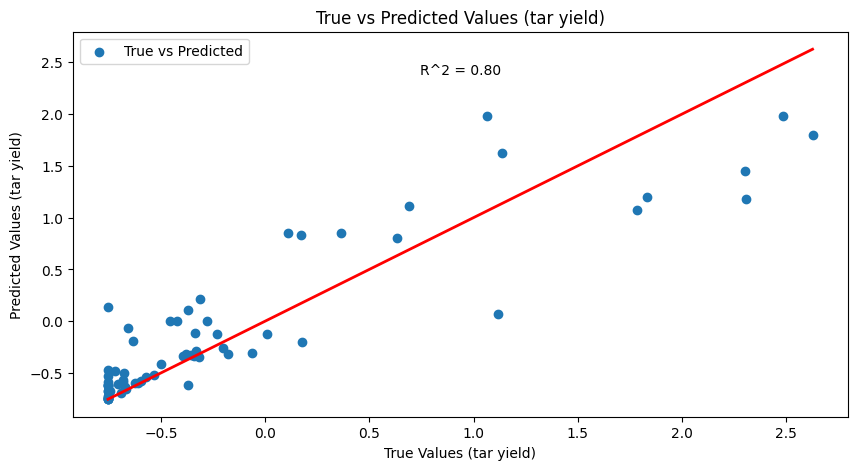

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(12)
# Set the given parameters


params = {
    'max_depth': 9,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 3,
    'n_estimators': 879,
}


# Create the Random Forest model with the given parameters
rf_model = RandomForestRegressor(**params)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE scores
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions, multioutput='raw_values'))
print("Random Forest RMSE Scores:", rf_rmse)

# Calculate R^2 scores
rf_r2 = r2_score(y_test, rf_predictions, multioutput='raw_values')
print("Random Forest R^2 Scores:", rf_r2)
r1 = r2_score(y_test, rf_predictions)
print("Random Forest R^2 Scores:", r1)
residuals = y_test - rf_predictions

plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Calculate and print R^2 value
r2_total = r2_score(y_test, rf_predictions, multioutput='variance_weighted')
plt.text(0.5, 0.9, f'Total R^2 = {r2_total:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
plt.figure(figsize=(10, 5))
sns.violinplot(y=rf_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Violin Plot of Predicted Values for Each True Value')
plt.show()

# Create a scatter plot for each target variable
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 5))

    # Scatter plot
    plt.scatter(y_test[:, i], rf_predictions[:, i], label='True vs Predicted')

    # Diagonal line for reference
    plt.plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], color='red', linewidth=2)

    # Calculate and print R^2 value
    r2 = r2_score(y_test[:, i], rf_predictions[:, i])
    plt.text(0.5, 0.9, f'R^2 = {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

    plt.xlabel(f'True Values ({target_column})')
    plt.ylabel(f'Predicted Values ({target_column})')
    plt.title(f'True vs Predicted Values ({target_column})')
    plt.legend()
    plt.show()



In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

params = {
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf':1,
    'min_samples_split': 2,
    'n_estimators': 479,
}


# Assuming you have your training and testing data
# Replace X_train, y_train, X_test, y_test with your actual data

# Gaussian transformation using QuantileTransformer
quantile_transformer = RobustScaler()




# Fit the transformer on the training data
quantile_transformer.fit(y_train)

# Apply transformation to the target variable during fitting
transformed_regressor = TransformedTargetRegressor(regressor=RandomForestRegressor(**params),
                                                  transformer=quantile_transformer)

# Fit the model
transformed_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = transformed_regressor.predict(X_test)


# Evaluate the model using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print("Decision Tree Regression R^2 Scores:", r2)
r1 = r2_score(y_test, y_pred)
print("Decision Tree Regression R^2 Scores:", r1)

Root Mean Squared Error: [0.44515972 0.60702276 0.42976132 0.34379814 0.3459924  0.56421043
 0.36425279]
Decision Tree Regression R^2 Scores: [0.83737056 0.70901234 0.83274768 0.88941458 0.8654384  0.68627224
 0.82774   ]
Decision Tree Regression R^2 Scores: 0.806856544008558


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
        "random_state": 42,
    }



    quantile_transformer = RobustScaler()


    quantile_transformer.fit(y_train)
    transformed_regressor = TransformedTargetRegressor(regressor=RandomForestRegressor(**params),
                                                  transformer=quantile_transformer)
    transformed_regressor.fit(X_train, y_train)
    y_pred = transformed_regressor.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=True)
    return rmse




study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Best hyperparameters_RandomForest:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2024-01-04 18:35:28,576] A new study created in memory with name: no-name-9202a37b-12e9-479d-81e2-adade1a1acf7
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2024-01-04 18:35:29,969] Trial 0 finished with value: 0.428136903393043 and parameters: {'n_estimators': 792, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 0 with value: 0.428136903393043.
[I 2024-01-04 18:35:30,896] Trial 1 finished with value: 0.9065217526057553 and parameters: {'n_estimators': 433, 'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.428136903393043.
[I 2024-01-04 18:35:32,638] Trial 2 finished

Best hyperparameters_RandomForest: {'n_estimators': 479, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best RMSE: 0.20886018257313463
